# Διαχείριση αρχείων

## Η βιβλιοθήκη ``csv``

Τα αρχεία csv (comma separated values) είναι ένας πολύ συνηθισμένος τύπος αρχείου για μεταφορά δεδομένων. Αυτό σημαίνει ότι μπορούμε να εξάγουμε τα δεδομένα που έχουμε συλλέξει (π.χ. από ένα πείραμα) σε ένα τέτοιο αρχείο και στη συνέχεια να μοιράσουμε
το εν λόγω αρχείο σε οποιονδήποτε ενδιαφέρεται να αναλύσει τα δεδομένα μας.

<div>
    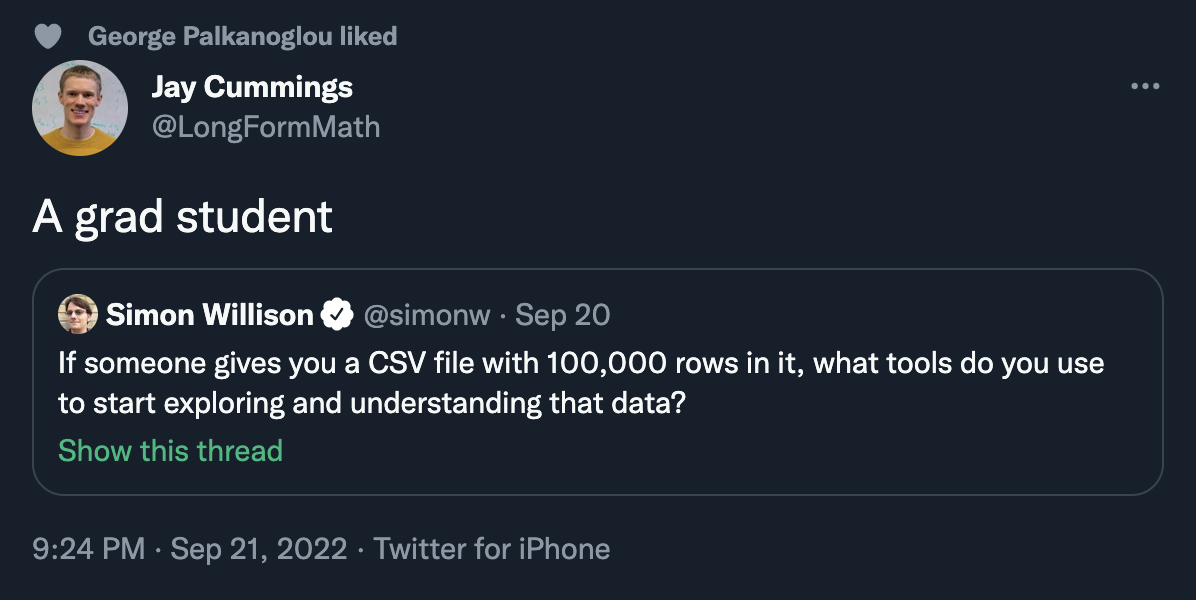
</div>

Αυτός ο τύπος δεδομένων είναι ιδιαίτερα δημοφιλής και συναντάται σε προγράμματα όπως το Excel και οι βάσεις δεδομένων. Όπως υποδηλώνει το όνομά του, κάθε τιμή διαχωρίζεται από μία άλλη μέσω της χρήσης ενός κόμματος.

In [1]:
! head -5 'data/sample.csv'

first_name,last_name,email,gender,ip_address,date
Roobbie,Wilbore,rwilbore0@bandcamp.com,Female,82.243.17.211,1/7/2018
Aprilette,Dole,adole1@altervista.org,Female,12.132.123.75,3/27/2017
Phillipe,Winkworth,pwinkworth2@wufoo.com,Male,71.62.119.246,1/20/2018
Arvy,Lempke,alempke3@squidoo.com,Male,117.227.52.135,10/20/2017


### Διάβασμα αρχείου

Έχοντας λοιπόν ένα τέτοιο αρχείο κειμένου, μπορούμε να το προσπελάσουμε με το μπλοκ κώδικα:

````python
with open('text_file.ext', 'r') as file:
    for line in file:
        print(line)
````

Το αρχείο διαβάζεται όπως υποδηλώνεται από την παράμετρο ``r`` (read-mode), ενώ σε κάθε επανάληψη του βρόγχου εκτυπώνεται μία συμβολοσειρά που περιέχει ολόκληρη τη γραμμή του κειμένου. Αυτό συνεχίζεται μέχρι να τελειώσουν οι γραμμές από τις οποίες αποτελείται το κείμενο του αρχείου.

Έχοντας αυτή τη συμβολοσειρά μπορούμε να εκτελέσουμε τις γνωστές μεθόδους που ισχύσουν για την κλάση ``str`` ώστε να εξάγουμε τα δεδομένα που θέλουμε.

Παρ' όλα αυτα, υπάρχει και ένας άλλος τρόπος να προσπελάσουμε ένα αρχείο και αυτός είναι χρησιμοποιώντας κάποιον διαχειριστή αρχείου. Η προεγκατεστημένη βιβλιοθήκη ``csv`` μας προσφέρει έναν τέτοιο διαχειριστή. Αυτός ο διαχειριστής είναι ουσιαστικά ένα αντικείμενο της βιβλιοθήκης ``csv`` όπου μπορούμε να πραγματοποιήσουμε κάποια επανάληψη επί αυτού (είναι δηλαδή iterable) και να πάρουμε τις γραμμές του αρχείου csv, ως λίστες με τις τιμές που περιέχει η κάθε γραμμή.

**Προσοχή**: Οι τιμές που περιέχει η κάθε λίστα είναι συμβολοσειρές ακόμα και αν τα δεδομένα που υπάρχουν στο αρχείο είναι αριθμητικά. Αν θέλουμε περαιτέρω επεξεργασία των δεδομένων, πρέπει να πάμε στις αντίστοιχες θέσεις και να τα μετατρέψουμε σε αριθμητικά δεδομένα. 

Ουσιαστικά, χρησιμοποιώντας έναν διαχειριστή κειμένου μετατρέψαμε το πρόβλημα της εξαγωγής δεδομένων από αρχείο σε πρόβλημα επεξεργασίας λιστών και τίποτα παραπάνω. Πολλές φορές είναι προτιμότερο να δουλεύουμε με τα δεδομένα μας να είναι αποθηκευμένα σε κάποια λίστα παρά να μας παρέχονται με τη μορφή συμβολοσειράς.

In [2]:
import csv

In [3]:
# Open the file in read mode
with open('data/sample.csv', 'r') as data_file:
    
    # This object is the iterator
    csv_reader = csv.reader(data_file)
    
    # Print the first 5 rows of the text file
    n=0
    for line in csv_reader:
        n+=1
        if n<=5:
            print(line)
        else: break

['first_name', 'last_name', 'email', 'gender', 'ip_address', 'date']
['Roobbie', 'Wilbore', 'rwilbore0@bandcamp.com', 'Female', '82.243.17.211', '1/7/2018']
['Aprilette', 'Dole', 'adole1@altervista.org', 'Female', '12.132.123.75', '3/27/2017']
['Phillipe', 'Winkworth', 'pwinkworth2@wufoo.com', 'Male', '71.62.119.246', '1/20/2018']
['Arvy', 'Lempke', 'alempke3@squidoo.com', 'Male', '117.227.52.135', '10/20/2017']


Παρατηρούμε ότι η πρώτη λίστα περιέχει μία επικεφαλίδα (header) όπου περιγράφει τι είδους δεδομένα έχει η κάθε στήλη. Επειδή μπορεί να θέλουμε μόνο τα δεδομένα που περιέχει το αρχείο, χωρίς το header, μπορούμε να προσπεράσουμε την πρώτη γραμμή του αρχείου χρησιμοποιώντας την συνάρτηση ``next``. Αυτή είναι μία συνάρτηση που αφορά τους iterators όπως είναι το αντικείμενο ``csv_reader`` που δημιουργήσαμε.

In [4]:
# Open the file in read mode
with open('data/sample.csv', 'r') as data_file:
    
    # This object is the iterator
    csv_reader = csv.reader(data_file)
    
    # Skip first line
    next(data_file)
    
    # Print the first 5 rows of the text file
    n=0
    for line in csv_reader:
        n+=1
        if n<=5:
            print(line)
        else: break

['Roobbie', 'Wilbore', 'rwilbore0@bandcamp.com', 'Female', '82.243.17.211', '1/7/2018']
['Aprilette', 'Dole', 'adole1@altervista.org', 'Female', '12.132.123.75', '3/27/2017']
['Phillipe', 'Winkworth', 'pwinkworth2@wufoo.com', 'Male', '71.62.119.246', '1/20/2018']
['Arvy', 'Lempke', 'alempke3@squidoo.com', 'Male', '117.227.52.135', '10/20/2017']
['Cody', 'Jakov', 'cjakov4@i2i.jp', 'Female', '172.197.66.100', '5/23/2017']


### Εγγραφή δεδομένων σε αρχείο

Έχοντας επεξεργαστεί με όποιον τρόπο επιθυμούμε τα δεδομένα μας, μπορούμε με τη σειρά μας, να αποθηκεύσουμε τα νέα δεδομένα σε ένα καινούργιο αρχείο csv.

Η διαδικασία εγγραφής σε ένα αρχείο κειμένου είναι αντίστοιχη με αυτή του διαβάσματος του αρχείου. Αυτή τη φορά όμως θα χρησιμοποιήσουμε έναν διαχειριστή ``writer`` (αντί του ``reader``).

Στο συγκεκριμένο παράδειγμα θα προσθέσουμε μία ακόμα στήλη που θα περιέχει έναν τυχαίο αριθμό (0 ή 1). Επίσης θα αποθηκεύσουμε τα δεδομένα σε ένα νέο αρχείο χρησιμοποιώντας όμως ως διαχωριστή (delimiter) ένα tab-space αντί του κόμματος.

In [5]:
import random

# In the first iteration we will create the header info
# for the new column
first_run = True # flag variable

# Open original data in read mode
with open('data/sample.csv', 'r') as data_old:
    
    csv_reader = csv.reader(data_old)
    
    # Open a new file in write mode
    with open('data/new_sample.csv', 'w') as data_new:
        
        csv_writer = csv.writer(data_new, delimiter='\t')
        
        for line in csv_reader:
            if first_run:
                line.append('random_number')
                csv_writer.writerow(line) # write the header info
                first_run = False
            else:
                line.append(random.randint(0,1))
                csv_writer.writerow(line) # write the data

In [6]:
! head -5 'data/new_sample.csv'

Παρατηρείστε ότι τώρα οι τιμές στο αρχείο κειμένου διαχωρίζονται με ένα tab-space αντί για κόμμα, αλλά το αρχείο εξακολουθεί να είναι csv. 

Τι θα γίνει αν προσπαθήσουμε να ανοίξουμε ένα τέτοιο αρχείο χωρίς να προσδιορίσουμε τον τρόπο με τον οποίο διαχωρίζονται τα δεδομένα;

In [7]:
with open('data/new_sample.csv', 'r') as file:
    csv_reader = csv.reader(file) # By default it assumes a comma delimiter
    
    n=0
    for row in csv_reader:
        n+=1
        if n<=5:
            print(row)
        else: break

['first_name\tlast_name\temail\tgender\tip_address\tdate\trandom_number']
['Roobbie\tWilbore\trwilbore0@bandcamp.com\tFemale\t82.243.17.211\t1/7/2018\t0']
['Aprilette\tDole\tadole1@altervista.org\tFemale\t12.132.123.75\t3/27/2017\t1']
['Phillipe\tWinkworth\tpwinkworth2@wufoo.com\tMale\t71.62.119.246\t1/20/2018\t1']
['Arvy\tLempke\talempke3@squidoo.com\tMale\t117.227.52.135\t10/20/2017\t1']


Παρατηρούμε ότι πλέον κάθε λίστα περιέχει μία μόνο τιμή. Συγκεκριμένα περιέχει μία μόνο συμβολοσειρά που είναι ολόκληρη η γραμμή του αρχείου. Αυτο συμβαίνει γιατί η προεπιλογή για τον διαχειριστή του αρχείου είναι να περιμένει το κόμμα ως τον διαχωριστή για τις τιμές.

Αν έχουμε ένα αρχείο που χρησιμοποιεί κάτι άλλο, εκτός του κόμματος, για να διαχωρίσει τις τιμές του αρχείου τότε πρέπει να δώσουμε ως όρισμα ποιόν διαχωριστή να χρησιμοποιήσει όταν διαβάζει το αρχείο.

Για το παράδειγμα με το καινούργιο αρχείο που δημιουργήσαμε, αυτός ο διαχωριστής είναι το tap-space.

In [8]:
with open('data/new_sample.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    
    n=0
    for line in reader:
        n+=1
        if n<=5:
            print(line)
        else: break

['first_name', 'last_name', 'email', 'gender', 'ip_address', 'date', 'random_number']
['Roobbie', 'Wilbore', 'rwilbore0@bandcamp.com', 'Female', '82.243.17.211', '1/7/2018', '0']
['Aprilette', 'Dole', 'adole1@altervista.org', 'Female', '12.132.123.75', '3/27/2017', '1']
['Phillipe', 'Winkworth', 'pwinkworth2@wufoo.com', 'Male', '71.62.119.246', '1/20/2018', '1']
['Arvy', 'Lempke', 'alempke3@squidoo.com', 'Male', '117.227.52.135', '10/20/2017', '1']


**Challenge**

Ο διαχειριστής αρχείων που προσφέρεται από τη βιβλιοθήκη ``csv`` δεν περιορίζεται μόνο σε αρχεία που έχουν κατάληξη ".csv".
Για να διαπιστώσετε ότι αυτό που χρειάζεται να ξέρει ο διαχειριστής είναι μόνο ο τρόπος με τον οποίο διαχωρίζονται τα δεδομένα σε ένα αρχείο, θα εξετάσετε το αρχείο κειμένου ``words.txt``.

Το συγκεκριμένο αρχείο είναι ένα είδους "λεξικό" που περιέχει έναν μεγάλο αριθμό λέξεων. **Διαβάστε** το εν λόγω αρχείο χρησιμοποιώντας την βιβλιοθήκη ``csv`` και προσέχοντας να δώσετε τον κατάλληλο διαχωριστή.

Έχοντας διαβάσει το αρχείο, **γράψτε κώδικα που θα εξετάζει αν μία λέξη της επιλογής σας υπάρχει στο "λεξικό"**. Εαν υπάρχει τότε να εκτυπώνει ένα συγχαρητήριο μήνυμα που θα βεβαιώνει ότι **υπάρχει** η λέξη. Εάν η λέξη δεν υπάρχει τότε θα τυπώνει ένα μήνυμα όπου θα βεβαιώνει τον χρήστη ότι η συγκεκριμένη λέξη **δεν υπάρχει** στο λεξικό.

In [9]:
# You can try it here

## Παράρτημα: Σύνδεση με το λειτουργικό σύστημα

### Η βιβλιοθήκη ``os``

Η συγκεκριμένη βιβλιοθήκη υπάρχει προεγκατεστημένη στην Python και μας επιτρέπει να αλληλεπιδρούμε με το λειτουργικό σύστημα του υπολογιστή μας.

Υπάρχουν πολλοί μέθοδοι που επιτελούν ένα μεγάλο εύρος λειτουργιών:

In [10]:
import os

print(dir(os))

['CLD_CONTINUED', 'CLD_DUMPED', 'CLD_EXITED', 'CLD_TRAPPED', 'DirEntry', 'EX_CANTCREAT', 'EX_CONFIG', 'EX_DATAERR', 'EX_IOERR', 'EX_NOHOST', 'EX_NOINPUT', 'EX_NOPERM', 'EX_NOUSER', 'EX_OK', 'EX_OSERR', 'EX_OSFILE', 'EX_PROTOCOL', 'EX_SOFTWARE', 'EX_TEMPFAIL', 'EX_UNAVAILABLE', 'EX_USAGE', 'F_LOCK', 'F_OK', 'F_TEST', 'F_TLOCK', 'F_ULOCK', 'MutableMapping', 'NGROUPS_MAX', 'O_ACCMODE', 'O_APPEND', 'O_ASYNC', 'O_CLOEXEC', 'O_CREAT', 'O_DIRECTORY', 'O_DSYNC', 'O_EXCL', 'O_EXLOCK', 'O_NDELAY', 'O_NOCTTY', 'O_NOFOLLOW', 'O_NONBLOCK', 'O_RDONLY', 'O_RDWR', 'O_SHLOCK', 'O_SYNC', 'O_TRUNC', 'O_WRONLY', 'POSIX_SPAWN_CLOSE', 'POSIX_SPAWN_DUP2', 'POSIX_SPAWN_OPEN', 'PRIO_PGRP', 'PRIO_PROCESS', 'PRIO_USER', 'P_ALL', 'P_NOWAIT', 'P_NOWAITO', 'P_PGID', 'P_PID', 'P_WAIT', 'PathLike', 'RTLD_GLOBAL', 'RTLD_LAZY', 'RTLD_LOCAL', 'RTLD_NODELETE', 'RTLD_NOLOAD', 'RTLD_NOW', 'R_OK', 'SCHED_FIFO', 'SCHED_OTHER', 'SCHED_RR', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'ST_NOSUID', 'ST_RDONLY', 'TMP_MAX', 'WCONTINUED', 

Ίσως μία από τις πιο σημαντικές δυνατότητες που μας προσφέρει η βιβλιοθήκη ``os`` είναι η περιήγηση στους φακέλους και υποφακέλους του συστήματός μας. Παρακάτω θα αναφέρουμε ενδεικτικά κάποια παραδείγματα που χρησιμοποιούνται πολύ συχνά στην ανάλυση δεδομένων.

Για αρχή, θα τυπώσουμε την τοποθεσία στην οποία εργαζόμαστε αυτή τη στιγμή και θα δούμε τα περιεχόμενά:

In [11]:
# Get current working directory (equivalent to "pwd" command in unix systems)
print(os.getcwd())

# Save this path to a variable in order to navigate here later
original_path = os.getcwd()
print(original_path)

/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing


In [12]:
# List items in current directory (or another path if you pass an absolute path as argument)
# This is equivalent to "ls -a" command in Unix systems
# This method returns a list with the names of all files in the directory (default dir is current directory)
print(os.listdir())

['05_solutions_data_processing.ipynb', 'snippets.ipynb', 'demo.txt', '04_practice_data_processing.ipynb', '02_csv_module.ipynb', '.ipynb_checkpoints', '01_numpy.ipynb', '03_pandas.ipynb', 'data']


Στη συνέχεια θα περιηγηθούμε στην επιφάνεια εργασίας και θα τυπώσουμε τα περιεχόμενα της καινούργιας τοποθεσίας:

In [13]:
# Navigate to Desktop
os.chdir("/Users/schanlar/Desktop")

# Get current working directory
print(os.getcwd())

/Users/schanlar/Desktop


Ας επιστρέψουμε στην αρχική μας τοποθεσία και θα δημιουργήσουμε εκεί έναν καινούργιο φάκελο με το όνομα ``tmp``. Μέσα σε αυτόν τον φάκελο θα υπάρχει ένας υποφάκελος με το όνομα ``inner_tmp``.

Υπαρχουν δύο μέθοδοι για να το υλοποιήσουμε: 

- Η μέθοδος ``os.mkdir()`` λειτουργεί όπως η εντολή ``mkdir`` στο τερματικό του υπολογιστή.


- Η μέθοδος ``os.makedirs()`` είναι παρόμοια, με την διαφορά ότι με αυτή μπορούμε να δημιουργήσουμε υποφακέλους και αυτόματα θα δημιουργηθούν και όλα τα ανώτερα στρώματα εμφώλευσης. Συνήθως αυτή η πιο γενική μέθοδος χρησιμοποιείται πιο συχνά καθώς καλύπτει και την λειτουργικότητα της πιο απλής μεθόδου ``os.mkdir()``.

In [14]:
# Navigate back to original directory
os.chdir(original_path)

# Make (sub)directories
os.makedirs("tmp/inner_tmp")

print(os.listdir())
print(os.listdir('tmp'))

['05_solutions_data_processing.ipynb', 'snippets.ipynb', 'demo.txt', '04_practice_data_processing.ipynb', '02_csv_module.ipynb', '.ipynb_checkpoints', '01_numpy.ipynb', '03_pandas.ipynb', 'data', 'tmp']
['inner_tmp']


Παρόμοια με την δημιουργία φακέλων και υποφακέλων σε κάποια τοποθεσία, μπορούμε επίσης και να διαγράψουμε φακέλους και υποφακέλους.

- Η μέθοδος ``os.rmdir()`` λειτουργεί όπως η εντολή ``rm`` στο τερματικό του υπολογιστή.


- Η μέθοδος ``os.removedirs()`` είναι παρόμοια, με την διαφορά ότι θα διαγράψει όλα τα περιεχόμενα του κυρίως φακέλου. Λειτουργεί δηλαδή όπως η εντολή ``rm -rf`` στο τερματικό του υπολογιστή. **Η διαγραφή φακέλων με αυτόν τον τρόπο απαιτεί μεγάλη προσοχή.**

In [15]:
# Remove the tmp directory will all of its contents
os.removedirs('tmp/inner_tmp/')

print(os.listdir())

['05_solutions_data_processing.ipynb', 'snippets.ipynb', 'demo.txt', '04_practice_data_processing.ipynb', '02_csv_module.ipynb', '.ipynb_checkpoints', '01_numpy.ipynb', '03_pandas.ipynb', 'data']


Μπορούμε φυσικά να μετονομάσουμε και αρχεία. Ας μετονομάσουμε το αρχείο ``demo.txt`` σε ``demo2.txt``. Αν βρισκόμαστε στην ίδια τοποθεσία με το αρχείο που θέλουμε να μετονομάσουμε, μπορούμε να χρησιμοποιήσουμε την μέθοδο:

> os.rename("old_filename", "new_filename")

In [16]:
os.rename("demo.txt", "demo2.txt")

print(os.listdir())

# and rename it back
os.rename("demo2.txt", "demo.txt")

print(os.listdir())

['05_solutions_data_processing.ipynb', 'snippets.ipynb', '04_practice_data_processing.ipynb', 'demo2.txt', '02_csv_module.ipynb', '.ipynb_checkpoints', '01_numpy.ipynb', '03_pandas.ipynb', 'data']
['05_solutions_data_processing.ipynb', 'snippets.ipynb', 'demo.txt', '04_practice_data_processing.ipynb', '02_csv_module.ipynb', '.ipynb_checkpoints', '01_numpy.ipynb', '03_pandas.ipynb', 'data']


Είδαμε κάποιες βασικές συναρτήσεις που μας επιτρέπουν να αλληεπιδράσουμε το λειτουργικό σύστημα με το να περιηγηθούμε σε διάφορες τοποθεσίες και να τροποποιήσουμε αρχεία. Εναλλακτικά, θα μπορούσαμε να χρησιμοποιήσουμε την μέθοδο ``os.system("some command")`` που μας επιτρέπει να γράφουμε τις εντολές όπως ακριβώς θα τις πληκτρολογούσαμε στο τερματικό του υπολογιστή.

In [17]:
# Create a file named demo3.txt
os.system("touch demo3.txt")

print(os.listdir())

# Remove the file
os.system("rm demo3.txt")

print(os.listdir())

['05_solutions_data_processing.ipynb', 'snippets.ipynb', 'demo.txt', '04_practice_data_processing.ipynb', '02_csv_module.ipynb', 'demo3.txt', '.ipynb_checkpoints', '01_numpy.ipynb', '03_pandas.ipynb', 'data']
['05_solutions_data_processing.ipynb', 'snippets.ipynb', 'demo.txt', '04_practice_data_processing.ipynb', '02_csv_module.ipynb', '.ipynb_checkpoints', '01_numpy.ipynb', '03_pandas.ipynb', 'data']


Τέλος, ένα από τα πιο συχνά προβλήματα που θα θελήσετε να λύσετε όταν δουλεύετε με μεγάλα σύνολα δεδομένων που είναι αποθηκευμένα σε διαφορετικές τοποθεσίες, είναι η αυτοματοποίηση κάποιων διαδικασιών. Για το σκοπό αυτό είναι απαραίτητη η σωστή διαχείρηση των διάφορων paths (π.χ. συνένωση διαδρομών με αποφυγή διπλών "/").  

Για το σκοπό αυτό μπορούμε να χρησιμοποιήσουμε το module ``os.path``.

In [18]:
main_data_dir = "/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/data"
munich_data = "munich_temperatures_average_with_bad_data.txt"
california_data = "california_housing.csv"

# Bad practice
print(main_data_dir + "/" + munich_data)
print(main_data_dir + "/" + california_data)

# Instead...
print(os.path.join(main_data_dir, munich_data))
print(os.path.join(main_data_dir, california_data))

/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/data/munich_temperatures_average_with_bad_data.txt
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/data/california_housing.csv
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/data/munich_temperatures_average_with_bad_data.txt
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/data/california_housing.csv


In [19]:
# Other useful and commonly used methods

# Check the existance of a path
print(os.path.exists("/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/data"))
print(os.path.exists("/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/tmp"))

# Sometimes files can exist without an extension
# in this case we can check if something is a directory or a file
print(os.path.isdir("data"))
print(os.path.isdir("data/california_housing.csv"))
print(os.path.isfile("data/california_housing.csv"))

# Split the path and the extension of a file
# Usually easier than trying to manually parse a string
print(os.path.splitext("data/california_housing.csv"))

True
False
True
False
True
('data/california_housing', '.csv')


In [20]:
# and so much more...
print(dir(os.path))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_get_sep', '_joinrealpath', '_varprog', '_varprogb', 'abspath', 'altsep', 'basename', 'commonpath', 'commonprefix', 'curdir', 'defpath', 'devnull', 'dirname', 'exists', 'expanduser', 'expandvars', 'extsep', 'genericpath', 'getatime', 'getctime', 'getmtime', 'getsize', 'isabs', 'isdir', 'isfile', 'islink', 'ismount', 'join', 'lexists', 'normcase', 'normpath', 'os', 'pardir', 'pathsep', 'realpath', 'relpath', 'samefile', 'sameopenfile', 'samestat', 'sep', 'split', 'splitdrive', 'splitext', 'stat', 'supports_unicode_filenames', 'sys']


### Η βιβλιοθήκη ``glob``

Η συγκεκριμένη βιβλιοθήκη υπάρχει επίσης προεγκατεστημένη στην Python και χρησιμοποιείται πολύ συχνά όταν έχουμε να δουλέψουμε με πολλαπλά αρχεία.

Ίσως η πιο χρήσιμη μέθοδος είναι η συνάρτηση ``glob()`` που μας επιτρέπει να προσπελάσουμε επαναληπτικά όλα τα αρχεία και τους φακέλους σε μία τοποθεσία. Σε συνδυασμό με τη βιβλιοθήκη ``os`` μπορούμε να φτιάξουμε κώδικα που να αυτοματοποιεί πολλές διαδικασίες εύρεσης μοτίβων και επεξεργασίας αρχείων.

In [21]:
import glob

print(dir(os))

['CLD_CONTINUED', 'CLD_DUMPED', 'CLD_EXITED', 'CLD_TRAPPED', 'DirEntry', 'EX_CANTCREAT', 'EX_CONFIG', 'EX_DATAERR', 'EX_IOERR', 'EX_NOHOST', 'EX_NOINPUT', 'EX_NOPERM', 'EX_NOUSER', 'EX_OK', 'EX_OSERR', 'EX_OSFILE', 'EX_PROTOCOL', 'EX_SOFTWARE', 'EX_TEMPFAIL', 'EX_UNAVAILABLE', 'EX_USAGE', 'F_LOCK', 'F_OK', 'F_TEST', 'F_TLOCK', 'F_ULOCK', 'MutableMapping', 'NGROUPS_MAX', 'O_ACCMODE', 'O_APPEND', 'O_ASYNC', 'O_CLOEXEC', 'O_CREAT', 'O_DIRECTORY', 'O_DSYNC', 'O_EXCL', 'O_EXLOCK', 'O_NDELAY', 'O_NOCTTY', 'O_NOFOLLOW', 'O_NONBLOCK', 'O_RDONLY', 'O_RDWR', 'O_SHLOCK', 'O_SYNC', 'O_TRUNC', 'O_WRONLY', 'POSIX_SPAWN_CLOSE', 'POSIX_SPAWN_DUP2', 'POSIX_SPAWN_OPEN', 'PRIO_PGRP', 'PRIO_PROCESS', 'PRIO_USER', 'P_ALL', 'P_NOWAIT', 'P_NOWAITO', 'P_PGID', 'P_PID', 'P_WAIT', 'PathLike', 'RTLD_GLOBAL', 'RTLD_LAZY', 'RTLD_LOCAL', 'RTLD_NODELETE', 'RTLD_NOLOAD', 'RTLD_NOW', 'R_OK', 'SCHED_FIFO', 'SCHED_OTHER', 'SCHED_RR', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'ST_NOSUID', 'ST_RDONLY', 'TMP_MAX', 'WCONTINUED', 

In [22]:
# Show all paths to files in the data directory

for path in glob.glob("data/*"):
    print(path)

data/simple.csv
data/sample.csv
data/california_housing.csv
data/munich_temperatures_average_with_bad_data.txt
data/new_sample.csv
data/words.txt
data/employees.csv


In [23]:
# Common routines include searching for pattern of files
# in various directories, manipulating files etc

# The main directory where lots of stuff is stored
main_dir = "/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/"

# I want to iterate through the subdirectories
for path in glob.glob(os.path.join(main_dir, '*')):
    if os.path.isdir(path):
        # if there is a subdirectory list its contents
        print(os.listdir(path))
    else:
        # Not necessary; just for demo purposes
        print(f"{path} is not a directory!")

/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/05_solutions_data_processing.ipynb is not a directory!
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/snippets.ipynb is not a directory!
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/demo.txt is not a directory!
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/04_practice_data_processing.ipynb is not a directory!
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/02_csv_module.ipynb is not a directory!
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/01_numpy.ipynb is not a directory!
/Users/schanlar/Documents/GitHub/python-UoC/02.Data_Processing/03_pandas.ipynb is not a directory!
['simple.csv', 'sample.csv', 'california_housing.csv', 'munich_temperatures_average_with_bad_data.txt', 'new_sample.csv', 'words.txt', 'employees.csv']
